<h1> Group 20 - DMMML Coursework 2<h1>
    
<hr>

<h3 style="color:blue"> Data <h3> 

Goal : Setup full training data set :

In [235]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#read the attribute csvs file into respective dataframes
X = pd.read_csv ('x_train_gr_smpl.csv')


# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']

#join the two such that Y is the last column
XYraw = pd.concat([X,Y], axis=1)
#check the concatination
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [236]:

#convert numberic to nominal 
XYraw[['Class']] = XYraw[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

XYraw.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,zero
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,zero
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,zero
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,zero
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,zero


In [237]:

#randomise 
XYraw_ran = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw_ran)

          0      1      2      3      4      5      6      7      8      9  \
0     201.0  184.0  157.0  151.0  161.0  164.0  162.0  172.0  154.0  138.0   
1     208.0  182.0  166.0  206.0  235.0  249.0  228.0  193.0  172.0  208.0   
2     181.0  246.0  254.0  255.0  255.0  255.0  254.0  227.0  173.0  216.0   
3      62.0   63.0   64.0   64.0   61.0   59.0   59.0   61.0   65.0   72.0   
4      41.0   22.0   23.0   26.0   42.0   80.0   92.0   92.0   91.0   90.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  170.0  171.0  172.0  175.0  174.0  168.0  164.0  166.0  155.0  146.0   
9686   99.0   99.0  100.0   99.0   98.0   98.0   98.0   99.0   99.0  100.0   
9687   25.0   25.0   25.0   27.0   28.0   30.0   32.0   34.0   36.0   35.0   
9688   12.0   13.0   12.0   11.0   10.0   10.0   10.0   11.0   11.0   12.0   
9689   85.0   83.0   82.0   81.0   80.0   79.0   80.0   82.0   83.0   84.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

In [238]:
#generate this as a csv to directly feed into analyses on independent notebooks
XYraw_ran.to_csv('For_10_Fold_Cross_Validation.csv', index = False)

Split Data into data and expected calsses


In [239]:
#read in data from csv 
training_Data = pd.read_csv("For_10_Fold_Cross_Validation.csv")

#look at shape
training_Data.shape 

#look at data format
training_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,201.0,184.0,157.0,151.0,161.0,164.0,162.0,172.0,154.0,138.0,...,27.0,22.0,19.0,18.0,18.0,19.0,18.0,19.0,25.0,four
1,208.0,182.0,166.0,206.0,235.0,249.0,228.0,193.0,172.0,208.0,...,247.0,238.0,226.0,208.0,189.0,174.0,167.0,157.0,150.0,one
2,181.0,246.0,254.0,255.0,255.0,255.0,254.0,227.0,173.0,216.0,...,57.0,79.0,107.0,120.0,121.0,124.0,122.0,120.0,120.0,seven
3,62.0,63.0,64.0,64.0,61.0,59.0,59.0,61.0,65.0,72.0,...,153.0,160.0,156.0,155.0,179.0,167.0,137.0,120.0,138.0,one
4,41.0,22.0,23.0,26.0,42.0,80.0,92.0,92.0,91.0,90.0,...,61.0,59.0,60.0,46.0,51.0,45.0,40.0,40.0,46.0,one


In [240]:
#define the data to be used as all but the class attribute from the data 
X_Train = training_Data.drop('Class', axis = 1)

#define the expexted value to be the class column of the input data 
y_train = training_Data['Class']

Scale data

In [241]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_Train)



<h4> Setup Test Data <h4>

Goal : Import test data from file and set it as  t_test and y_test

In [242]:
testData = pd.read_csv ('Test_Dataset.csv')

X_Test = testData.drop('Class', axis = 1)
y_test = testData['Class']


X_test = sc.fit_transform(X_Test)

<h4> Setup 4000 Split of test data <h4>
    

Goal : Take 4000 instances from the original training file and add them to the test file

In [243]:
#Check length of training data
len(training_Data)

9690

In [244]:
#split data into two divisions
data_split4000, data_split5690= training_Data[:4000], training_Data[4000:]

#test new split 
len(data_split4000)

4000

In [245]:
#merge test and 4000 cases from above 
testData_with4000 =pd.concat([testData, data_split4000])

In [246]:
#size of testData before addition
len(testData)

3090

In [247]:
#check items have been added to testData
len(testData_with4000)

7090

In [248]:
#setup training data
X_Train_4000Split = data_split5690.drop('Class', axis = 1)
y_train_4000Split = data_split5690['Class']


#setup test data
X_Test_4000Split = testData_with4000.drop('Class', axis = 1)
y_test_4000Split = testData_with4000['Class']



sc = StandardScaler()
X_train_4000Split = sc.fit_transform(X_Train_4000Split)
X_test_4000Split = sc.fit_transform(X_Test_4000Split)

<h4> Setup 9000 Split <h4> 

Goal : Take 9000 instances from the original training file and add them to the test file

In [249]:
#Check length of training data
len(training_Data)

9690

In [250]:
#split data into two divisions
data_split9000, data_split690= training_Data[:9000], training_Data[9000:]

#test new split 
len(data_split9000)

9000

In [251]:
#merge test and 4000 cases from above 
testData_with9000 =pd.concat([testData, data_split9000])

In [252]:
#size of testData before addition 
len(testData)

3090

In [253]:
#check items have been added to testData
len(testData_with9000)

12090

In [254]:
#setup training data
X_Train_9000Split = data_split690.drop('Class', axis = 1)
y_train_9000Split = data_split690['Class']


#setup test data
X_Test_9000Split = testData_with4000.drop('Class', axis = 1)
y_test_9000Split = testData_with4000['Class']

#scale data
X_train_9000Split = sc.fit_transform(X_Train_9000Split)
X_test_9000Split = sc.fit_transform(X_Test_9000Split)

Summary : 

X_train - full training data (minus class data) <br>
X_train_4000Split - 4000 removed instances from X_train<br>
X_train_9000Split - 9000 removed instances from X_train <br>

X_test - original test data 
X_test_4000Split - 4000 more instances, taken from X_train<br>
X_test_9000Split - 9000 more instances, taken from X_train<br>

y_train - class attributes for the full training data<br>
y_train_4000Split - 4000 removed instances than y_train<br>
y_train_9000Split - 9000 removed instances than y_train<br>

y_test - class attributes for original testing data <br>
y_test_4000Split - 4000 more instances, taken from y_train <br>
y_test_9000Split - 9000 more instances, taken from y_train <br>

<h2> Decision Trees <h2> 
    <hr>
<h3> J48 <h3>

Decision tree adapted from : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<hr>
Cross-Validation adapted from : 
https://scikit-learn.org/stable/modules/cross_validation.html 
    
HOWEVER Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. 

<h4> Cross validation <h4>

Goal : Run cross a decision tree classifier with 10 fold cross validation then output metrics

In [100]:
# imports for this sections 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [124]:
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#
# Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. Both 

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores = cross_val_score(classifier, X_train, y_train, cv=10)


Text(0.5, 1.0, 'Average score: 0.8379772961816304')

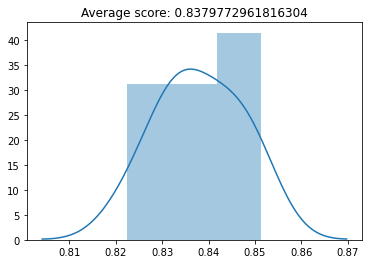

In [125]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores)))

In [126]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred = cross_val_predict(classifier, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48 = confusion_matrix(y_train, y_pred)

#accuracy report
classification_report_J48 = classification_report(y_train, y_pred)

In [127]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48)

print("\n")
print(classification_report_J48)
#print(roc_auc_score(y, y_pred))


Confusion Matrix
[[ 439    9    8   14   13    6   16   15   16    4]
 [   8  154    5   10    0    7    4    8   11    3]
 [   6    5 1760    3   77   13    7   23   75   11]
 [   6    5    2  202   13    6   10   16    8    2]
 [   7    7   96    8 1860   12   13   37  143   37]
 [   9    4    5    3   12  177    9    7   14    0]
 [  16    6   10    8   11    4  279   10   13    3]
 [  10    7   19   10   41    1   16 1223   78    5]
 [  11   12   97    8  134   10   11   76 1885    6]
 [   6    0   19    1   25    1    2    5   12  139]]


              precision    recall  f1-score   support

       eight       0.85      0.81      0.83       540
        five       0.74      0.73      0.74       210
        four       0.87      0.89      0.88      1980
        nine       0.76      0.75      0.75       270
         one       0.85      0.84      0.84      2220
       seven       0.75      0.74      0.74       240
         six       0.76      0.78      0.77       360
       three     

<hr>
<h4>Part 2 - Using test data<h4>

Goal : Run decision classifier on test data provided

In [133]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report_withTestData, confusion_matrix_withTestData

#define the model to be used 
classifier_withTestData = DecisionTreeClassifier()

#fit this model using the test data
classifier_withTestData.fit(X_train, y_train)

#test this model on the seperated data
y_pred = classifier_withTest.predict(X_test)


#confusion matrix generation
conf_matrix_withTestData = confusion_matrix(y_train, y_pred)

#accuracy report
classification_report_withTestData = classification_report(y_train, y_pred)
#package used for metrics of DecisionTreeClassifier


#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_withTestData)
print("\n")
print(classification_report_withTestData)

Confusion Matrix
[[ 64   9   7  12   6   9   8  20  12   3]
 [  0  28   0   0   0   2   0  30   0   0]
 [  5   4 460   1  61   6  10  53  44  16]
 [ 10   0   0  42   4   3   0   3  28   0]
 [  6   2  49   2 575   5   1  10  56  14]
 [  2   8   2   1  23  12   5   7   0   0]
 [ 16   8   0   6   5   1  40   7   7   0]
 [ 13   1  11   8  44   0   8 314  50   1]
 [  4   5  70   4  69   2   4  54 535   3]
 [  1   0  21   0   7   4   1   0   4  22]]


              precision    recall  f1-score   support

       eight       0.53      0.43      0.47       150
        five       0.43      0.47      0.45        60
        four       0.74      0.70      0.72       660
        nine       0.55      0.47      0.51        90
         one       0.72      0.80      0.76       720
       seven       0.27      0.20      0.23        60
         six       0.52      0.44      0.48        90
       three       0.63      0.70      0.66       450
         two       0.73      0.71      0.72       750
        z

<hr>
<h4>Part 3 - 4000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set.

In [212]:
#define the model to be used 
classifier_4000Split = DecisionTreeClassifier()

#fit this model using the test data
classifier_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_4000Split = classifier_4000Split.predict(X_test_4000Split)

In [213]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(confusion_matrix(y_test_4000Split, y_pred_4000Split))
print("\n")
print(classification_report(y_test_4000Split, y_pred_4000Split))

Confusion Matrix
[[ 237   17   22   18   26   10   22   20   21    7]
 [   1   94   18    2    1    3    3   19    3    0]
 [  12   15 1191    2   89    5    6   58  108    8]
 [  24   17    5  111    2   17    3   15    8    2]
 [  11    3  110    4 1186   10   16   38  211   24]
 [   5   23   10    0   12  100    6    5    5    3]
 [  15   12   10    9    5   10  157   11   12    0]
 [   4    5   17    9   56    6   23  775   99    4]
 [  17    9   92    6  164   21   11  113 1238   14]
 [   3    0   14    0   30    0    0    1   17   77]]


              precision    recall  f1-score   support

       eight       0.72      0.59      0.65       400
        five       0.48      0.65      0.55       144
        four       0.80      0.80      0.80      1494
        nine       0.69      0.54      0.61       204
         one       0.75      0.74      0.74      1613
       seven       0.55      0.59      0.57       169
         six       0.64      0.65      0.64       241
       three     

<hr>
<h4>Part 4 - 9000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set

In [215]:
from sklearn.tree import DecisionTreeClassifier 

#define the model to be used 
classifier_9000Split = DecisionTreeClassifier()

#fit this model using the test data
classifier_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_9000Split = classifier_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_9000Split = confusion_matrix(y_test_9000Split, y_pred_9000Split)

#generate classification report
classification_report_9000Split = classification_report(y_test_9000Split, y_pred_9000Split)

In [216]:

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_9000Split))
print("\n")
print(classification_report_9000Split))

Confusion Matrix
[[191  52  23  15  40   3  20  46   5   5]
 [  6  69  21   1  18   2   1  20   4   2]
 [ 33  21 852   6 279   9  15 144 118  17]
 [ 36  45   8  41  38   8   4  12   6   6]
 [ 77   7 199   4 933  34  15  79 229  36]
 [ 11  46  15   0  17  51   2   6  16   5]
 [ 44  14  18  12  26   8  73  34  11   1]
 [ 13   7  61  11 149   3  67 594  79  14]
 [ 38  25 139   4 310  18  27 245 812  67]
 [  7   0  39   0  40   1   0   6  12  37]]


              precision    recall  f1-score   support

       eight       0.42      0.48      0.45       400
        five       0.24      0.48      0.32       144
        four       0.62      0.57      0.59      1494
        nine       0.44      0.20      0.28       204
         one       0.50      0.58      0.54      1613
       seven       0.37      0.30      0.33       169
         six       0.33      0.30      0.31       241
       three       0.50      0.60      0.54       998
         two       0.63      0.48      0.55      1685
        z

<h3> Alternative Tree - Random Forest <h3> 
    
  

adapted from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<hr>
<h4> Cross Validation <h4>

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#create a Gaussian Classifier - random forest
randomForest = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest.fit(X_train, y_train)


#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_randomForest = cross_val_score(randomForest, X_train, y, cv=10)


Text(0.5, 1.0, 'Average score: 0.8356037151702786')

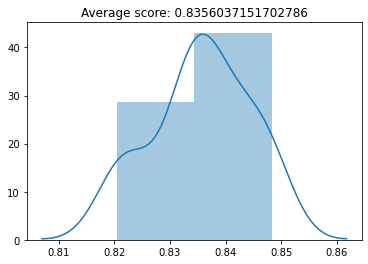

In [222]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_randomForest)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_randomForest)))

In [224]:

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred = cross_val_predict(randomForest, X_train, y_train, cv=10)

#allows for confusion matrix generation
conf_matrix_randomForest = confusion_matrix(y_train, y_pred)
classification_report_randomForest = classification_report(y_train, y_pred)

In [225]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_randomForest)

print("\n")
print(classification_report_randomForest)
#print(roc_auc_score(y, y_pred))

Confusion Matrix
[[ 528    0    0    1    7    0    1    2    1    0]
 [   2  199    1    3    0    1    1    0    3    0]
 [   0    0 1964    0    8    0    0    1    7    0]
 [   1    0    0  254    5    0    0    7    3    0]
 [   0    0   12    0 2178    0    0    2   28    0]
 [   1    0    1    0    1  237    0    0    0    0]
 [   3    0    4    0    5    0  339    6    3    0]
 [   0    0    4    0   13    0    0 1374   19    0]
 [   0    0   15    0   24    0    0   10 2201    0]
 [   0    0    1    0   22    0    0    0    2  185]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.98       540
        five       1.00      0.95      0.97       210
        four       0.98      0.99      0.99      1980
        nine       0.98      0.94      0.96       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.99      0.99       240
         six       0.99      0.94      0.97       360
       three     

<hr>
<h4> with Test data <h4> 

In [72]:
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier - random forest

randomForest = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest.fit(X_train, y_train)

#assign the predicted values as the result of running the model on the split test data
y_pred = randomForest.predict(X_test)

In [73]:
#Print Confusion matrix and other important results

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[112   0   1   1   1   0   1   0   1   0]
 [  0  49   0   1   0   0   0   0   1   0]
 [  0   0 391   0   0   0   0   0   1   0]
 [  0   0   0  53   1   0   0   1   0   0]
 [  0   0   3   1 435   0   0   0   6   0]
 [  0   0   0   0   0  45   0   0   0   0]
 [  0   0   0   0   2   0  72   2   0   0]
 [  0   0   1   0   4   0   0 267   2   0]
 [  0   0   2   0   5   0   0   5 430   0]
 [  0   0   1   0   4   0   0   0   0  36]]


              precision    recall  f1-score   support

       eight       1.00      0.96      0.98       117
        five       1.00      0.96      0.98        51
        four       0.98      1.00      0.99       392
        nine       0.95      0.96      0.95        55
         one       0.96      0.98      0.97       445
       seven       1.00      1.00      1.00        45
         six       0.99      0.95      0.97        76
       three       0.97      0.97      0.97       274
         two       0.98      0.97      0.97       442
        z

<h6> Support Vector Classification <h6> 
    

Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [74]:
#-----------Setup 

from sklearn.svm import SVC

# split data into test set and training set, to reduce bias

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
#Create a svm Classifier
svmClassifier= SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmClassifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svmClassifier.predict(X_test)

In [76]:
#Print Confusion matrix and other important results

from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))


Confusion Matrix
[[ 99   0   0   2   2   0   0   0   0   3]
 [  1  34   0   0   0   0   0   1   0   0]
 [  0   0 376   0   9   0   0   2   8   2]
 [  3   1   0  55   0   0   0   0   1   0]
 [  1   0  12   0 416   0   0   1  23   2]
 [  0   1   0   0   0  56   0   0   0   0]
 [  0   0   1   0   0   0  60   1   0   0]
 [  0   0   6   0   2   0   0 268   5   0]
 [  0   0   6   0  16   0   1   8 413   1]
 [  0   0   0   0   3   0   0   0   0  36]]


              precision    recall  f1-score   support

       eight       0.95      0.93      0.94       106
        five       0.94      0.94      0.94        36
        four       0.94      0.95      0.94       397
        nine       0.96      0.92      0.94        60
         one       0.93      0.91      0.92       455
       seven       1.00      0.98      0.99        57
         six       0.98      0.97      0.98        62
       three       0.95      0.95      0.95       281
         two       0.92      0.93      0.92       445
        z

<h2> Neural Networks <h2>
   <hr>

<h3> Linear Classifier <h3>

<h3> MLP <h3>